In [31]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

In [32]:
# Function to apply Quantum Fourier Transform on the circuit
def apply_qft(circuit, qubits):
    """Apply the Quantum Fourier Transform on the specified qubits in the circuit."""
    num_qubits = len(qubits)
    for i in range(num_qubits):
        circuit.h(qubits[i])
        for j in range(i + 1, num_qubits):
            circuit.cp(np.pi / 2**(j - i), qubits[j], qubits[i])
    for i in range(num_qubits // 2):
        circuit.swap(qubits[i], qubits[num_qubits - i - 1])

In [33]:
# Initialize the simulator
backend = AerSimulator()

In [34]:
# Define a 5-qubit quantum register and a classical register
q = QuantumRegister(5, 'q')
c = ClassicalRegister(5, 'c')

In [35]:
# Create the quantum circuit
circuit = QuantumCircuit(q, c)
circuit.x(q[4])
circuit.x(q[2])
circuit.x(q[0])

In [36]:
# Apply QFT on the quantum register
apply_qft(circuit, q)

In [37]:
# Measure the qubits
circuit.measure(q, c)

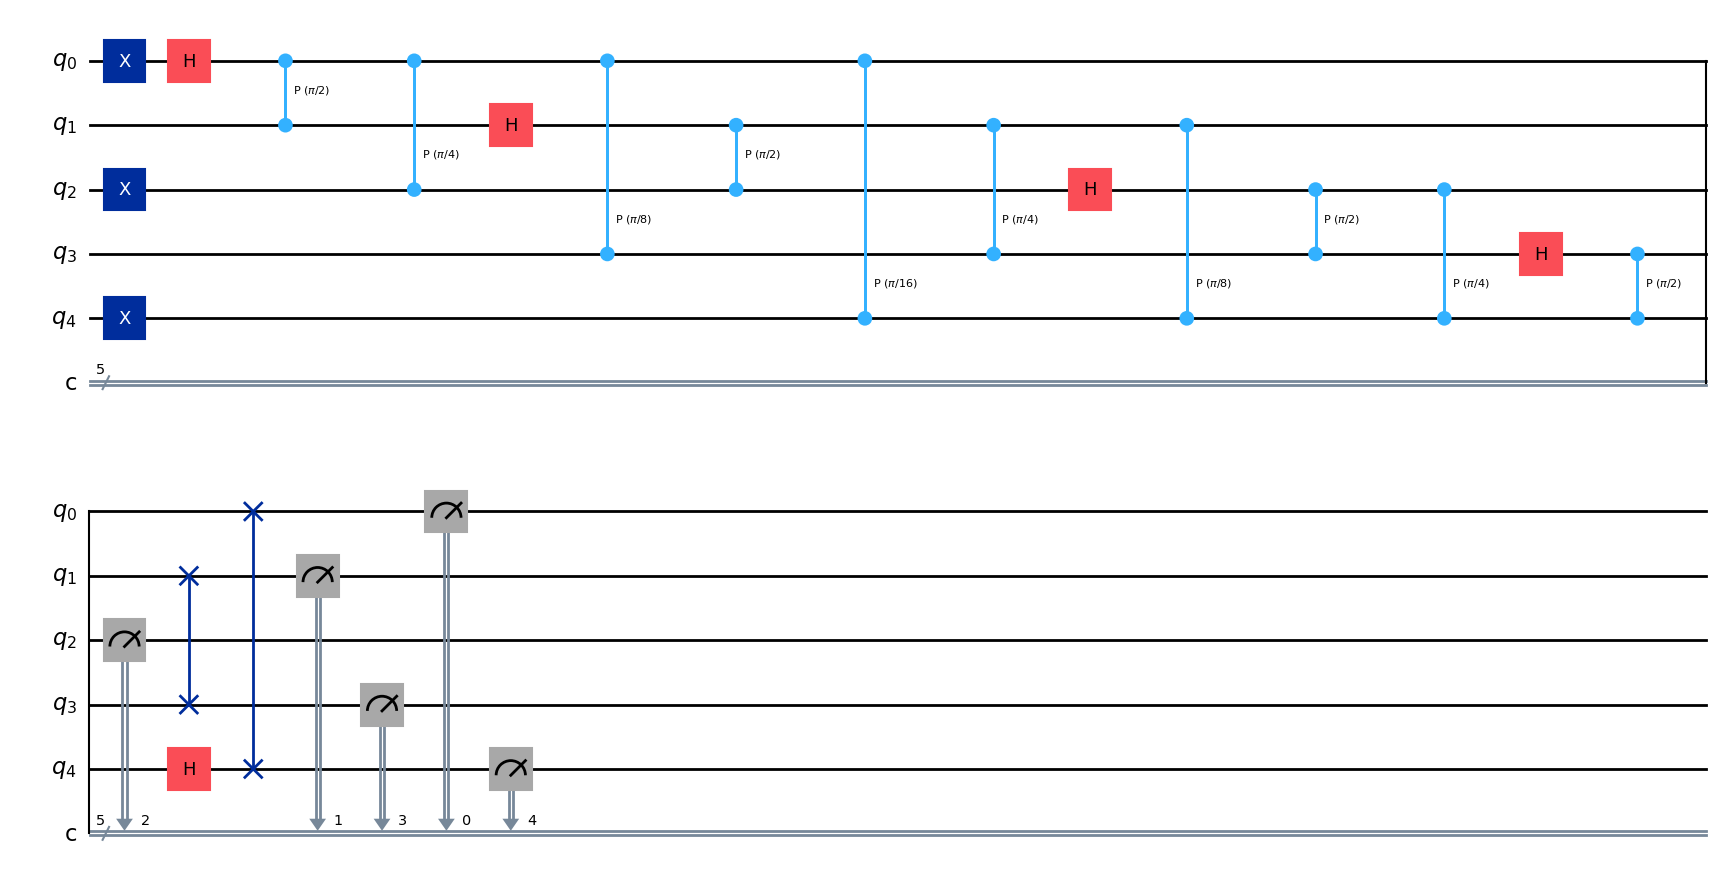

In [38]:
# Draw the circuit
circuit.draw(output='mpl')

In [39]:
# Run the circuit using the simulator backend
job = backend.run(circuit, shots=1000)
result = job.result()
counts = result.get_counts()

In [40]:
# Display results
print("\nQFT Output")
print("------------")
print(counts)


QFT Output
------------
{'11111': 27, '11000': 27, '10001': 29, '11110': 30, '11010': 27, '00001': 39, '00010': 35, '10100': 28, '00111': 34, '01010': 25, '11100': 30, '10101': 21, '00101': 30, '01000': 31, '00000': 33, '11001': 37, '10000': 25, '00110': 37, '11101': 34, '10011': 21, '01110': 34, '00011': 32, '10110': 31, '11011': 33, '01001': 37, '10010': 30, '01011': 35, '01100': 36, '00100': 34, '01111': 32, '10111': 31, '01101': 35}


1. Library Imports
The code begins by importing essential modules from qiskit and other libraries:
QuantumCircuit, QuantumRegister, and ClassicalRegister for circuit and register creation.
QiskitRuntimeService and AerSimulator to establish IBMQ services and enable circuit simulation.
QFT from qiskit.circuit.library, which provides a pre-built Quantum Fourier Transform gate.

2. Setting up IBM Quantum Service
The QiskitRuntimeService() function is instantiated with an API key to authenticate and connect to IBM's quantum services. This setup is essential when accessing IBM's cloud-based simulators or actual quantum computers.

3. Backend Selection
service.backend("ibmq_qasm_simulator") attempts to access IBM’s simulator backend. The AerSimulator is set as an alternative, which allows running simulations locally if the IBM backend is unavailable.

4. Creating Quantum and Classical Registers
QuantumRegister and ClassicalRegister are created with 5 qubits each, representing the number of qubits the QFT will act on. The registers are then added to the QuantumCircuit.

5. Applying Initial X Gates
circuit.x(q[i]) applies an X (NOT) gate to specific qubits, setting initial states to 1 for those qubits. These initial states help visualize how QFT transforms input states.

6. Adding the QFT Circuit
The QFT gate is added to the circuit using circuit += QFT(num_qubits=5). This line configures a 5-qubit QFT that performs a quantum Fourier transformation on the qubit states, preparing them in the frequency domain representation.

7. Measurement
circuit.measure(q, c) measures each qubit in the quantum register q and stores the results in the classical register c. This step captures the final state post-QFT for analysis.

8. Running the Circuit
The circuit is executed on the selected backend (backend.run(circuit)). If using AerSimulator, this simulates the circuit locally. The output is then stored for further analysis.

9. Result Analysis
Using result.get_counts(), the frequency of each output bitstring is retrieved, representing the quantum measurement results post-QFT. The counts indicate how often each outcome occurred across the specified shots.